## Case Study on Indian Startups

1)Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

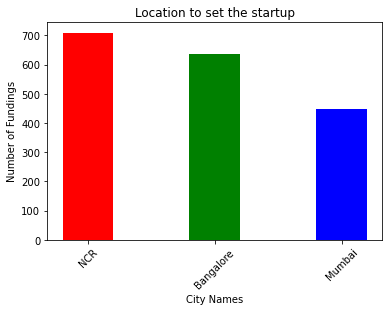

NCR 709
Bangalore 635
Mumbai 449


In [1]:
import pandas as pd #importing pandas
import matplotlib.pyplot as plt #importing matplotlib
data_frame = pd.read_csv("C:/Users/srira/OneDrive/Desktop/startup.csv") #Loading the data
data_frame["CityLocation"].dropna("",inplace = True) #Droping the values in CityLocation which are Nan
    
def seperate(city):
    city = str(city)
    return city.split("/")[0].strip()
data_frame["CityLocation"] = data_frame["CityLocation"].apply(seperate) #Since few startups having multiple locations we need to consider indian locations
data_frame["CityLocation"].replace("bangalore","Bangalore",inplace = True) #Replacing bangalore to Bangalore
data_frame["CityLocation"].replace("Delhi","New Delhi",inplace = True) #Replacing Delhi with New Delhi
data_frame["CityLocation"].replace("New Delhi","NCR",inplace = True) #Replacing New Delhi as NCR
data_frame["CityLocation"].replace("Gurgaon","NCR",inplace = True) #Replacing Gurgaon as NCR
data_frame["CityLocation"].replace("Noida","NCR",inplace = True) #Replacing Noida as NCR


city_NumFundings = data_frame["CityLocation"].value_counts()[:3] #Using value_counts function we will get top 3 cities in which more number of fundings has been done
city = city_NumFundings.index #Here we will get the city names
num_fundings = city_NumFundings.values #Here we will get the values 

#Ploting the Graph
colors = ["red","green","blue"]
plt.bar(city,num_fundings,width = 0.4,color = colors) #Here we are ploting graph between City and its fundings
plt.xlabel("City Names") #using xlabel attribute we will get City Names in x-axis
plt.ylabel("Number of Fundings") #using ylabel we will get Number of Funding in y-axis
plt.title("Location to set the startup") #title function will show the title of the graph at the top
plt.xticks(rotation = 45) #using xticks function we can set rotation of City Names in x-axis
plt.show() #show function will display the graph

for i in range(len(city)):
    print(city[i],num_fundings[i]) #printing city and the total Number of fundings in the city

2)Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

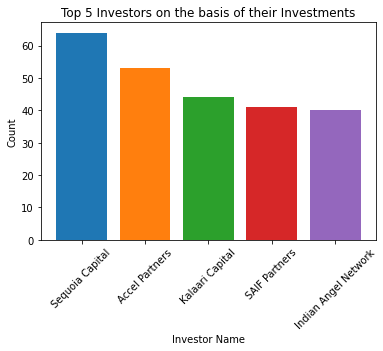

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
data_frame = pd.read_csv("C:/Users/srira/OneDrive/Desktop/startup.csv") 
data_frame.dropna(subset=["InvestorsName"],inplace=True) #Droping the values which are Nan in InvestorsName
investor  =  [] #creating the empty list with name investor
for i in data_frame["InvestorsName"]: #iterating in InvestorsName
    array = i.split(",") #In Investors name they may contain one or two investors so we are spliting by ","
    for j in array:
        ans = j.strip() 
        if ans == "" or ans == "undisclosed investors": #if it is empty string or undislocated investors then we need to ignore.
            continue
        investor.append(ans) #appending the investors in investor list     
top_5_investors = pd.DataFrame(investor).value_counts()[:5] #Here we are creating a data_frame with investor list and using value_counts() function will get the top 5 investors
investors = top_5_investors.index
count = top_5_investors.values

for i in range(len(investors)):
    plt.bar(investors[i],count[i])
    
plt.xlabel("Investor Name")
plt.ylabel("Count")
plt.title("Top 5 Investors on the basis of their Investments")
plt.xticks(rotation = 45)
plt.show()

for i in range(len(investors)):
    print(investors[i][0],count[i])

3)After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

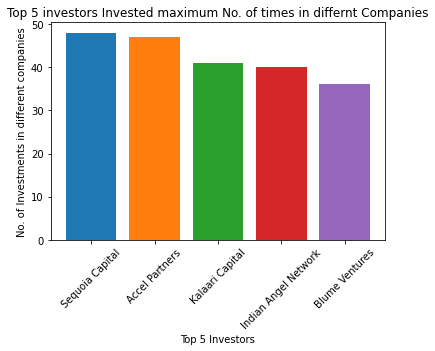

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data_frame = pd.read_csv("C:/Users/srira/Data sets/startup_funding.csv")
#Replacing the startups names 
data_frame["StartupName"].replace("Olacabs","Ola",inplace = True)
data_frame["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
data_frame["StartupName"].replace("oyo","Oyo",inplace = True)
data_frame["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
data_frame["StartupName"].replace("Oyorooms","Oyo",inplace = True)
data_frame["StartupName"].replace("OyoRooms","Oyo",inplace = True)
data_frame["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
data_frame["StartupName"].replace("Ola Cabs","Ola",inplace = True)
data_frame["StartupName"].replace("ola","Ola",inplace = True)
data_frame["StartupName"].replace("paytm","Paytm",inplace = True)
data_frame["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)
data_frame.dropna(subset = ["InvestorsName"],inplace = True)


top_investors=[] #creating an empty list in which we will store the investors
pairs=set() #Creating a set
for i in range(len(data_frame)):
    invester  =  data_frame.iloc[i]["InvestorsName"].split(',') #Here we are splitng with "," as InvestmentName may contain more than one
    for j in range(len(invester)):
        invester[j]=invester[j].strip()
        if invester[j]=='': #if the investor name is empty then we will ignore
            continue
        pair=(invester[j],data_frame.iloc[i]["StartupName"]) #Creating a tuple in that tuple we are storing investor name and in which company the investor invested.
        if pair in pairs: #if that tuple present in the set then we will continue without doing anything
            continue
        else:
            pairs.add(pair) #If the tuple is not present then we will add in the set
            top_investors.append(invester[j]) #We are appending the investor in the list
            
            

top_investors = pd.Series(top_investors).value_counts()[:5] #using value_counts() function we will get the investors who invested in multiple startups
top_5_investors = top_investors.index
count = top_investors.values

for i in range(len(top_5_investors)):
    plt.bar(top_5_investors[i],count[i])
    
plt.xlabel("Top 5 Investors")
plt.ylabel("No. of Investments in different companies")
plt.title("Top 5 investors Invested maximum No. of times in differnt Companies")
plt.xticks(rotation = 45)
plt.show()

for i in range(len(top_5_investors)):
    print(top_5_investors[i],count[i])

4)Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

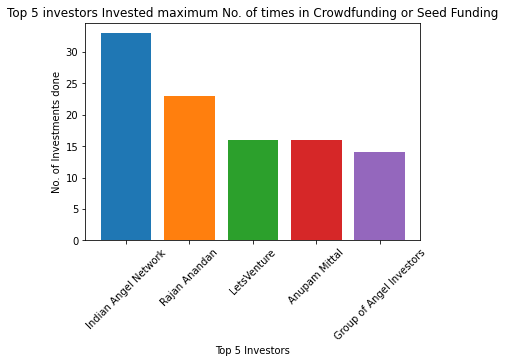

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data_frame = pd.read_csv("C:/Users/srira/Data sets/startup_funding.csv")


data_frame.dropna(subset = ["InvestorsName"],inplace = True)
data_frame.dropna(subset = ["StartupName"],inplace = True)
data_frame.dropna(subset = ["InvestmentType"],inplace = True)

data_frame["StartupName"].replace("Olacabs","Ola",inplace = True)
data_frame["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
data_frame["StartupName"].replace("oyo","Oyo",inplace = True)
data_frame["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
data_frame["StartupName"].replace("Oyorooms","Oyo",inplace = True)
data_frame["StartupName"].replace("OyoRooms","Oyo",inplace = True)
data_frame["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
data_frame["StartupName"].replace("Ola Cabs","Ola",inplace = True)
data_frame["StartupName"].replace("ola","Ola",inplace = True)
data_frame["StartupName"].replace("paytm","Paytm",inplace = True)
data_frame["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

data_frame['InvestmentType'].replace("PrivateEquity","Private Equity",inplace = True) #replacing PrivateEquity with Private Equity
data_frame['InvestmentType'].replace("SeedFunding","Seed Funding",inplace = True) #replacing SeedFunding with Seed Funding
data_frame['InvestmentType'].replace('crowd funding','Crowd Funding',inplace = True) #replacing crowd funding with Crowd Funding
data_frame = data_frame[(data_frame['InvestmentType'] == 'Seed Funding') | (data_frame['InvestmentType'] == 'Crowdfunding')]


top_investors=[]
pairs=set()
for i in range(len(data_frame)):
    invester  =  data_frame.iloc[i]["InvestorsName"].split(',')
    for j in range(len(invester)):
        invester[j]=invester[j].strip()
        if invester[j]=="" or invester[j]=="Undisclosed Investors" or invester[j]=="Undisclosed investors":
            continue
        pair=(invester[j],data_frame.iloc[i]["StartupName"])
        if pair in pairs:
            continue
        else:
            pairs.add(pair)
            top_investors.append(invester[j])
            
            

top_investors = pd.Series(top_investors).value_counts()[:5]
top_5_investors = top_investors.index
count = top_investors.values

for i in range(len(top_5_investors)):
    plt.bar(top_5_investors[i],count[i])
    
plt.xlabel("Top 5 Investors")
plt.ylabel("No. of Investments done")
plt.title("Top 5 investors Invested maximum No. of times in Crowdfunding or Seed Funding")
plt.xticks(rotation = 45)
plt.show()

for i in range(len(top_5_investors)):
    print(top_5_investors[i],count[i])

5)Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

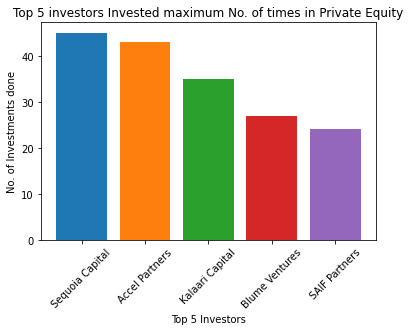

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data_frame = pd.read_csv("C:/Users/srira/Data sets/startup_funding.csv")
#Droping the vaues which are None
data_frame.dropna(subset = ["InvestorsName"],inplace = True)
data_frame.dropna(subset = ["StartupName"],inplace = True)
data_frame.dropna(subset = ["InvestmentType"],inplace = True)

data_frame["StartupName"].replace("Olacabs","Ola",inplace = True)
data_frame["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)
data_frame["StartupName"].replace("oyo","Oyo",inplace = True)
data_frame["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
data_frame["StartupName"].replace("Oyorooms","Oyo",inplace = True)
data_frame["StartupName"].replace("OyoRooms","Oyo",inplace = True)
data_frame["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
data_frame["StartupName"].replace("Ola Cabs","Ola",inplace = True)
data_frame["StartupName"].replace("ola","Ola",inplace = True)
data_frame["StartupName"].replace("paytm","Paytm",inplace = True)
data_frame["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)


data_frame['InvestmentType'].replace("PrivateEquity","Private Equity",inplace = True)
data_frame['InvestmentType'].replace("SeedFunding","Seed Funding",inplace = True)
data_frame['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
data_frame = data_frame[data_frame['InvestmentType'] == 'Private Equity'] #Here we are taking only data in which the investment type is Private Equity
data_frame.reset_index(inplace = True) #Reseting the index


top_investors=[]
pairs=set()
for i in range(len(data_frame)):
    invester  =  data_frame.iloc[i]["InvestorsName"].split(',')
    for j in range(len(invester)):
        invester[j]=invester[j].strip()
        if invester[j]=='':
            continue
        pair=(invester[j],data_frame.iloc[i]["StartupName"])
        if pair in pairs:
            continue
        else:
            pairs.add(pair)
            top_investors.append(invester[j])
            
            

top_investors = pd.Series(top_investors).value_counts()[:5]
top_5_investors = top_investors.index
count = top_investors.values

for i in range(len(top_5_investors)):
    plt.bar(top_5_investors[i],count[i])
    
plt.xlabel("Top 5 Investors")
plt.ylabel("No. of Investments done")
plt.title("Top 5 investors Invested maximum No. of times in Private Equity")
plt.xticks(rotation = 45)
plt.show()

for i in range(len(top_5_investors)):
    print(top_5_investors[i],count[i])

In [3]:
data_frame

,index,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
3,7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
4,8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
...,...,...,...,...,...,...,...,...,...,...,...
1061,2366,2366,28/01/2015,Grabhouse.com,NaN,NaN,NaN,"Kalaari Capital, Sequoia Capital",Private Equity,"2,500,000",Series A
1062,2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
1063,2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
1064,2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
